## Contents<a id='Contents'></a>
* [Brief Introduction about the dataset](#Introduction)
* [Import Packages](#Import_packages)
* [Load Data](#Load_Data)
    * [Dataset Explanation](#Dataset_Overview)
* [The Curiosity Questions](#Questions)
* [Explatory Data Analysis](#EDA)
    * [Data Profile](#Data_profile)
    * [Data Visualization](#Data_visualization)
        * [Histogram](#Visualize_Histogram)
        * [Box Plot](#Visualize_Boxplot)
        * [Count Plot](#Visualize_CountPlot)
        * [Scatter Plot](#Visualize_ScatterPlot)
    * [Relationship Investigation](#Relationships)
        * [Correlation Matrix](#Corr_Matrix)
        * [Heat Map](#Heatmap)
        * [Relationship Summary](#Relation_Summary)
* [Hypothesis Testing](#Hypothesis)
* [Data Analysis Summary](#Data_Analysis_Summary)
* [Modeling](#Modeling)
    * [Logistic Regression](#Logistic_Regression)
    * [K-Nearest Neighbors (KNN)](#KNN)
* [Conclusion and Future Work](#Conclusion)

## Brief Introduction about the dataset  <a id = 'Introduction'></a>

Sorce: **Kaggle.com** (https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset/code)


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

-  all patients here are females
-  at least 21 years old of Pima Indian heritage.
-  only one target dependent variable (Outcome).
 

## Import Packages  <a id = 'Import_packages'></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from ipywidgets import interact, widgets

## Load Data  <a id = 'Load_Data'></a>

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.shape

(768, 9)

In [5]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Dataset Explanation

The dataset contains data related to diabetes, containing features such as Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI (Body Mass Index), DiabetesPedigreeFunction, Age, and Outcome. 

Each row represents an individual, and the columns contain information about different aspects relevant to diabetes and an indication of the presence or absense if diabetes.

-  **Pregnancies**: Number of pregnancies the individual has had.
-  **Glucose**: Glucose concentration in the blood.
-  **BloodPressure**: Blood pressure measurement.
-  **SkinThickness**: Thickness of the skinfold.
-  **Insulin**: Insulin level.
-  **BMI (Body Mass Index)**: Body Mass Index, a measure of body fat based on height and weight.
-  **DiabetesPedigreeFunction**: A function that potentially represents the genetic predisposition to diabetes.
-  **Age**: Age of the individual.
-  **Outcome**: Binary variable indicating the presence (1) or absence (0) of diabetes.


## The Curiosity Questions <a id = 'Questions'></a>

-  What age group is represented in the dataset and how is the outcome (being diabetic or not) distributed?
-  Does pregnecy increase the risk of being diabetic?
-  Is there any correlation between Blood pressure, BMI and pregenancy being diabetic or not? 
-  Is there any significant difference in BMI, Insulin, Glucose, Blood pressure between diabetic and non-diabetic people?

## EDA (Exploratory Data Analysys) <a id ='EDA' ></a>

This section exmaines the data closely to determine:
-  Missing values.
-  Explore summary statistics of numerical features.
-  Visualize 

### Data Profiles <a id = 'Data_profile'> </a>

In [6]:
data_profile = dataset.describe().transpose()

# Add additional statistics if needed
data_profile['missing_values'] = dataset.isnull().sum()
data_profile['unique_values'] = dataset.nunique()


# Display the data profile table and Summary statstics 
print("")
print(f"\033[4m{'The DataTpyes'}\033[0m")
print(dataset.dtypes)

print("")
print(f"\033[4m{'Summary Statistics'}\033[0m")
print(data_profile)




The DataTpyes
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Summary Statistics
                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age        

This confirms the data is quite tidy and clean. There are no missing vaues

### Data Visualization <a id = 'Data_visualization'> </a>

#### Histogram: Visualize the distribution of each numerical variable. <a id = 'Visualize_Histogram'></a>

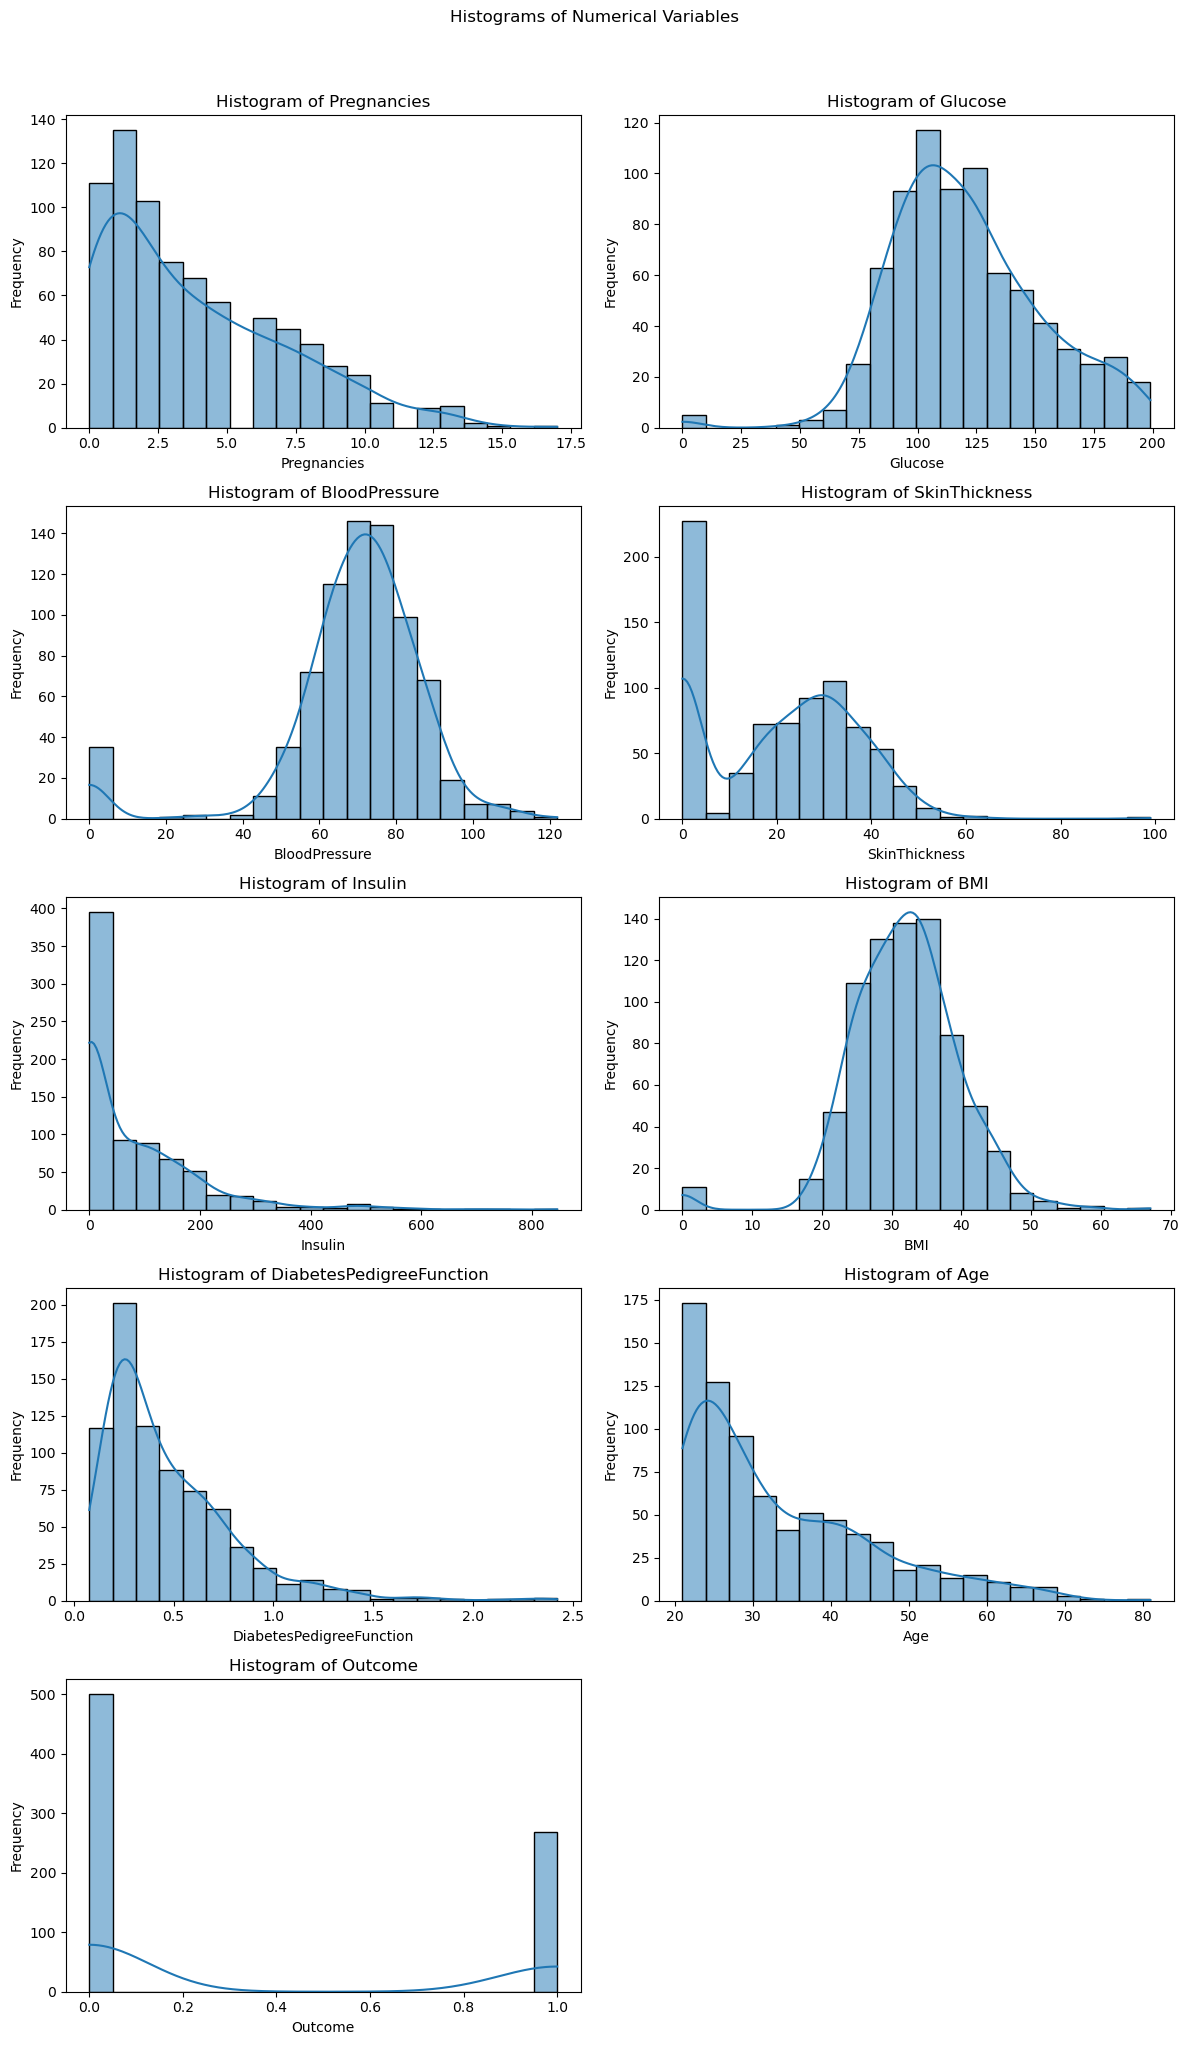

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = dataset.select_dtypes(include=['float64', 'int64']).columns


num_features = len(numerical_features)
num_rows = (num_features + 1) // 2  

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4 * num_rows))
fig.suptitle('Histograms of Numerical Variables', y=1.02)

# Flatten the axes for easier indexing
axes = axes.flatten()

# Plot histograms
for i, feature in enumerate(numerical_features):
    sns.histplot(dataset[feature], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots if there are an odd number of features
if num_features % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()


##### The presentation above exaplains the distrubution of the numerical features. The plots also supports visualize the smooth representation of the distribition helping us see the skewness in some of the distributions.

#### Boxplot: Visulaizw the data in manner to identify potential outliers and understand the spread of the data <a id = 'Visualize_Boxplot'> </a>

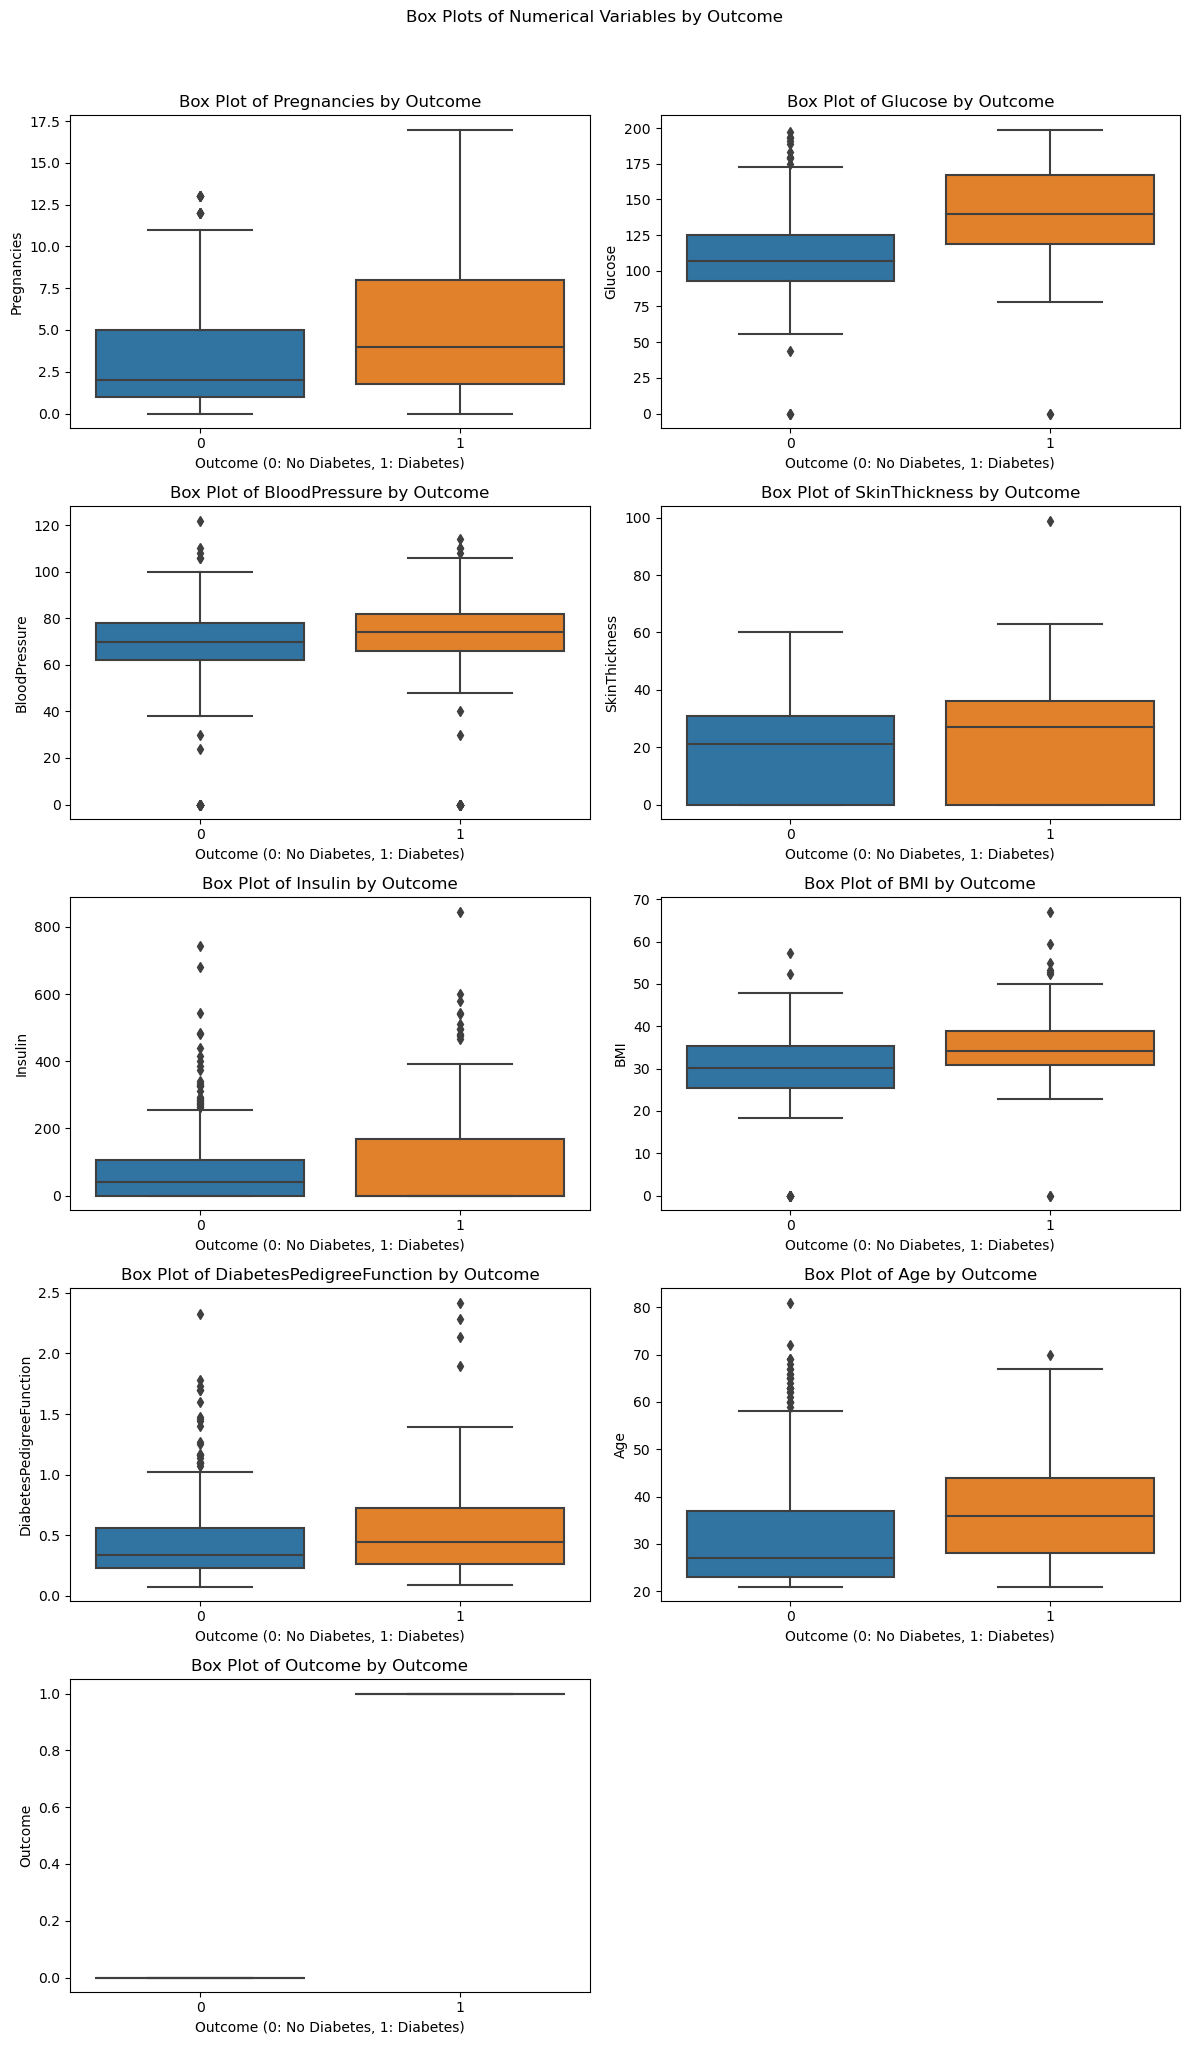

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = dataset.select_dtypes(include=['float64', 'int64']).columns

# Determine the layout of subplots
num_features = len(numerical_features)
num_rows = (num_features + 1) // 2  # Ensure an even number of rows for better layout

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4 * num_rows))
fig.suptitle('Box Plots of Numerical Variables by Outcome', y=1.02)

# Flatten the axes for easier indexing
axes = axes.flatten()

# Plot box plots
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=dataset['Outcome'], y=dataset[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature} by Outcome')
    axes[i].set_xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
    axes[i].set_ylabel(feature)

# Remove empty subplots if there are an odd number of features
if num_features % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()



Box plots help to identify potential outliers and understand the spread of the data.

#### Count Plot: Visualize the distribution of the categorical variable 'Outcome'. <a id = 'Visualize_CountPlot'> </a>

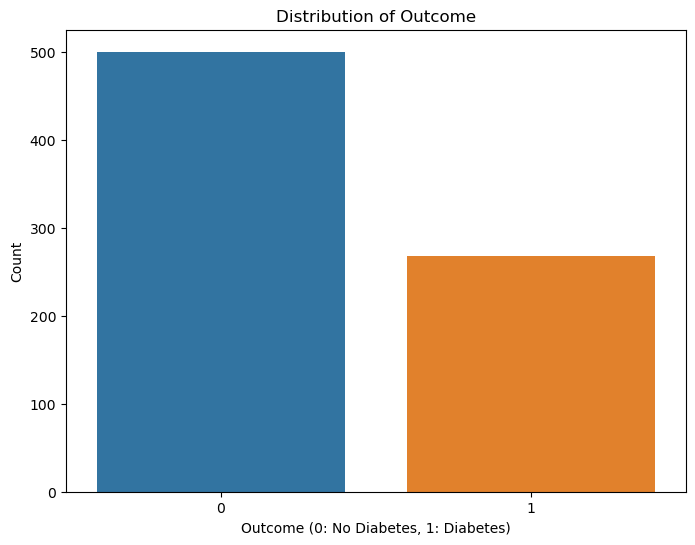

In [9]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=dataset)
plt.title('Distribution of Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()


#### Scatter Plots: Visualize pairwise relationships between numerical variables. <a id = 'Visualize_ScatterPlot'> </a>

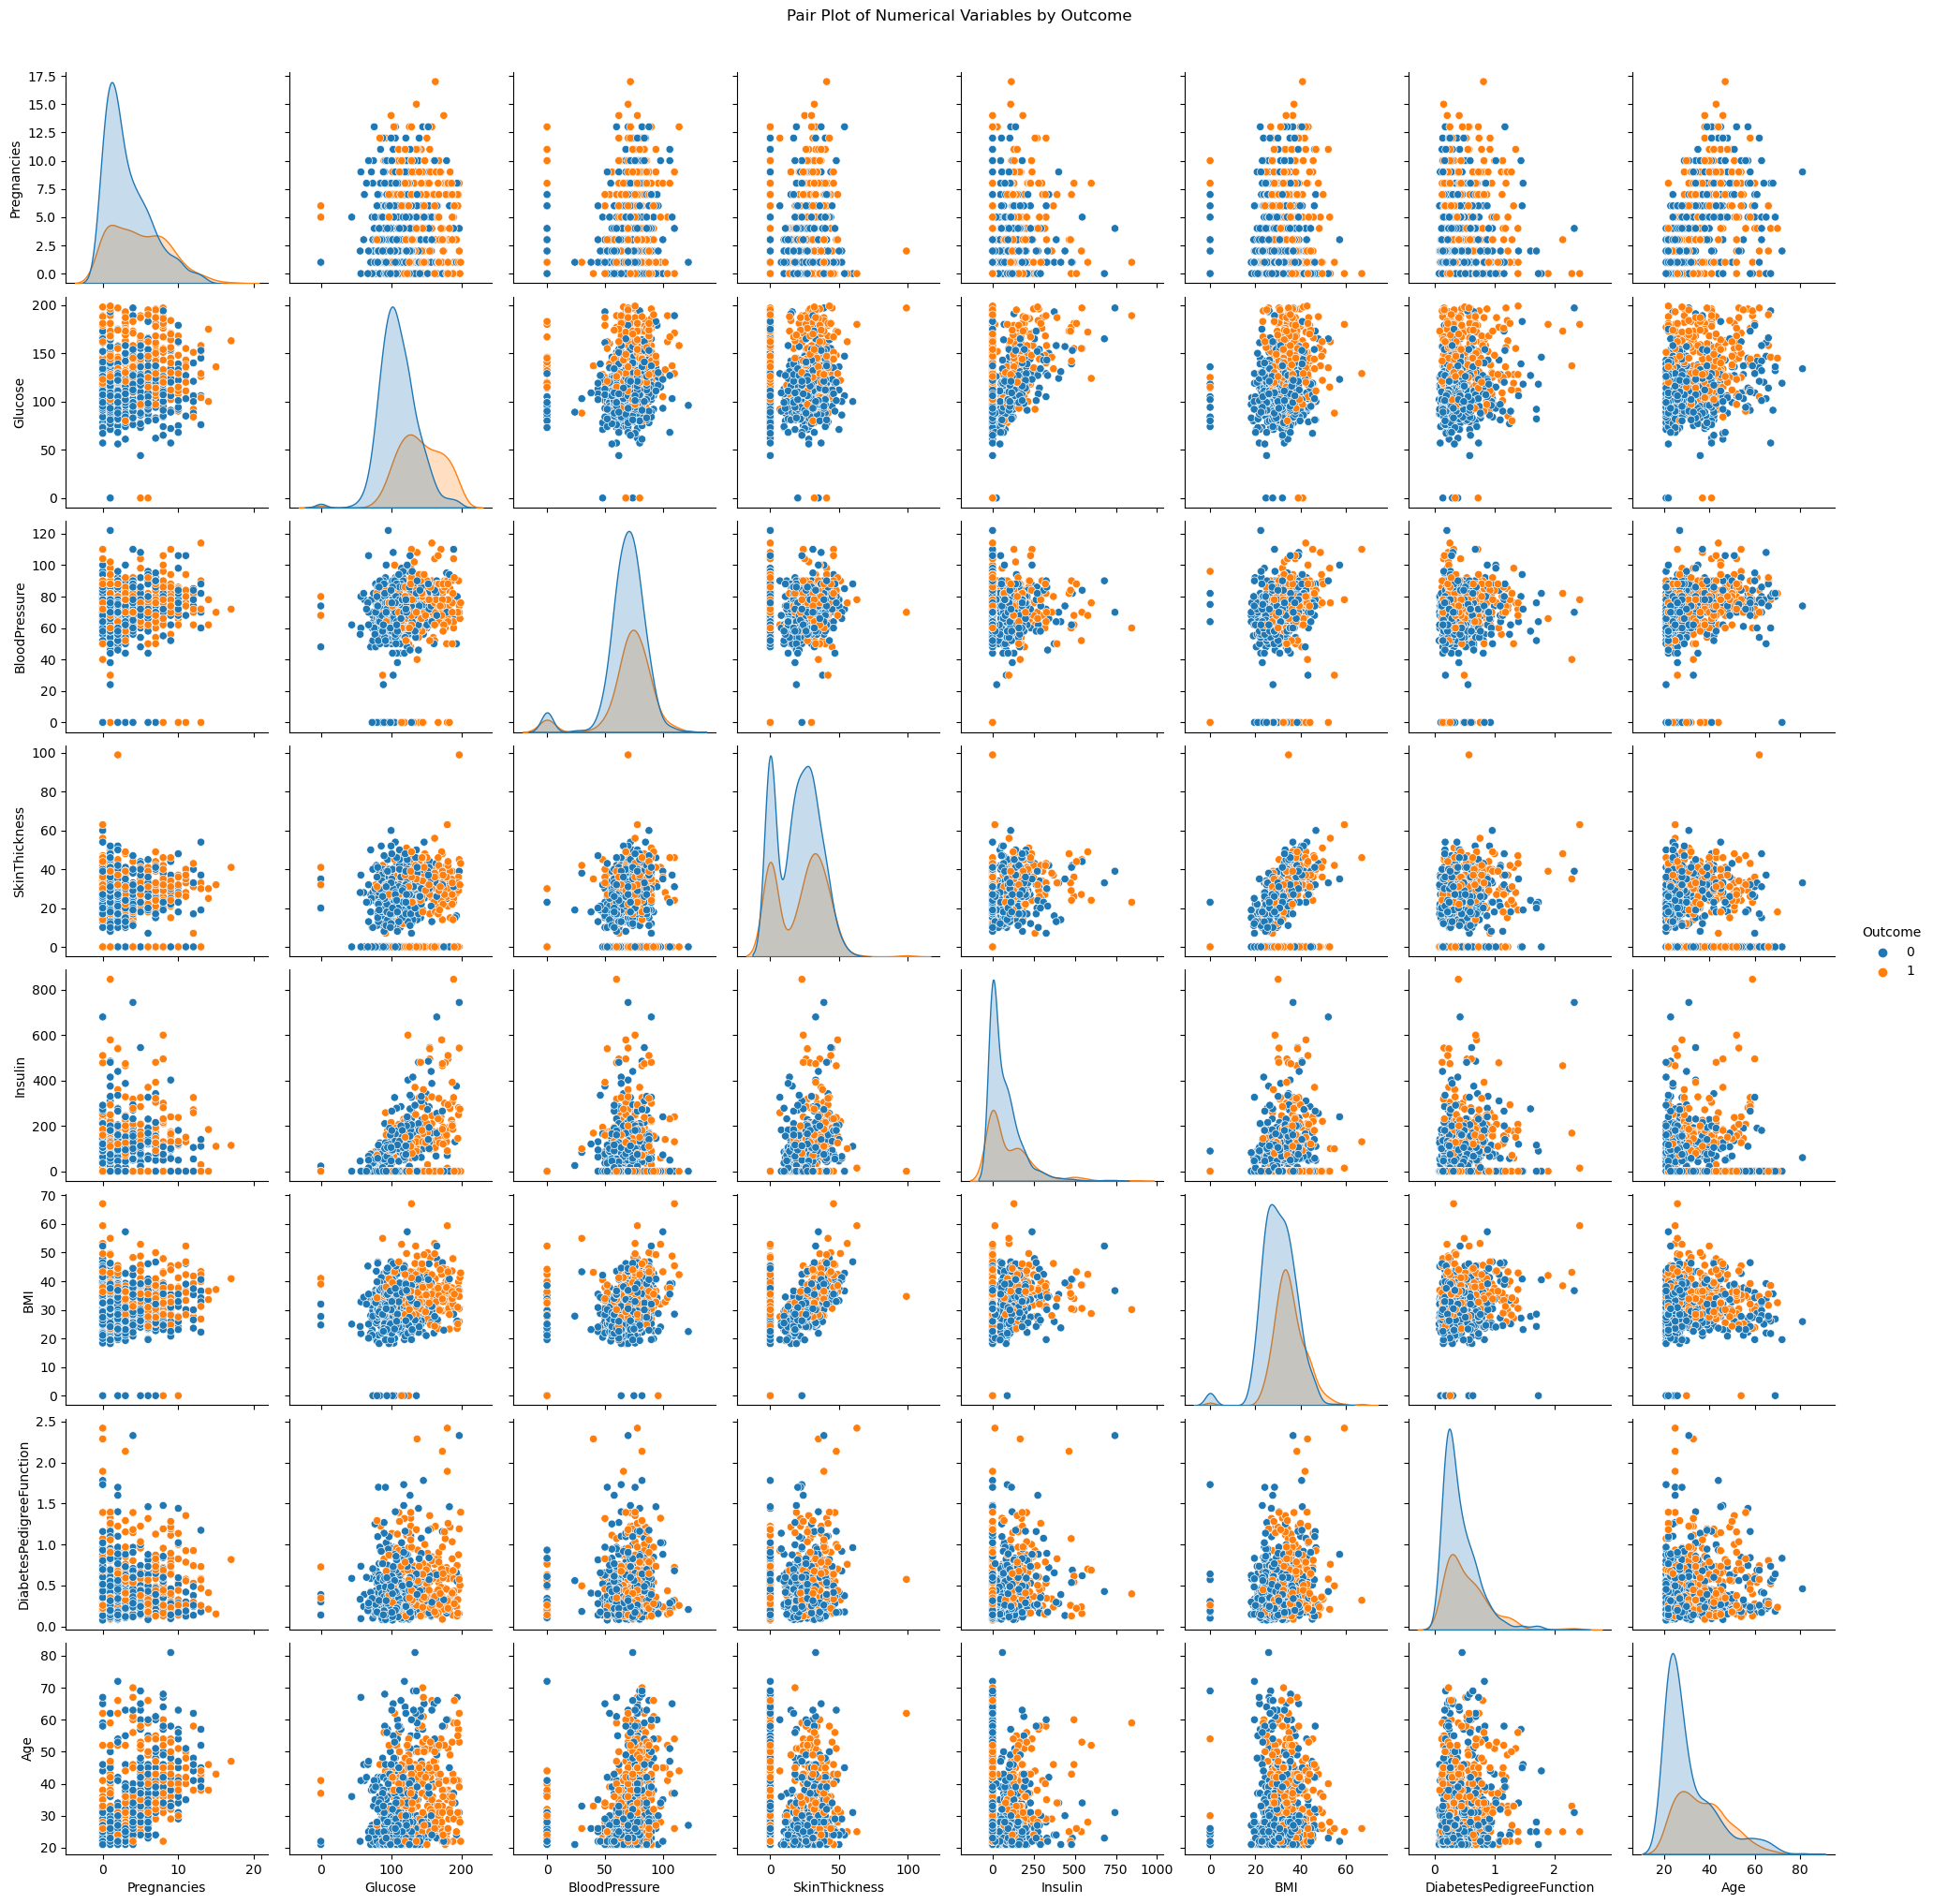

In [10]:

sns.pairplot(dataset, hue='Outcome', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Variables by Outcome', y=1.02)
plt.show()


These scatter plots help us visluaize:
-  **Relationship** between two features
-  **Possible Correlations** some with upward trend
-  **Identify Outliers** where some that show significant deviations 

## Relationship Investigation <a id = 'Relationships'> </a>

### Correlation Matrix <a id = 'Corr_Matrix'> </a>

In [11]:
import pandas as pd


correlation_matrix = dataset.corr()

# Print the correlation matrix
print(correlation_matrix)


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

### Heat Map <a id = 'Heatmap'> </a>

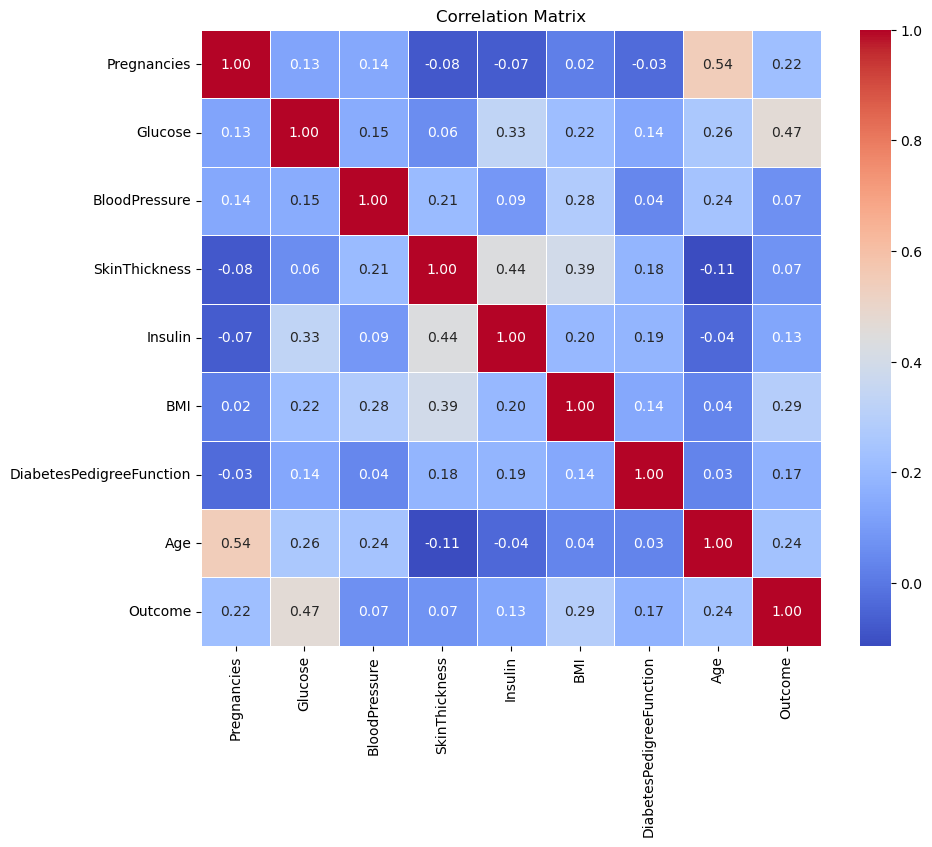

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


### Relationship Summary <a id = 'Relation_Summary'> </a>

Based on the Correlation Matrix and the Heatmap Visualization, we can infer that:
- Positive Correlationships between "Pregenancies and Age" and "Glucose and Outcome"
- Negative Correlationships between "Insulin and Age"Insulin and Age" and "SkinThickness and Age" 
- The strongest positive correlation with the outcome is seen with glucose levels, that supports the notion that high glucose levels are associated with a higher likelihood of diabetes


## Hypothesis Testing <a id = 'Hypothesis'> </a>

**Null Hypothesis (H0)**: There is no significant association between age, pregnancies, blood pressure, BMI, and the likelihood of having diabetes in the population represented by the dataset.

**Alternative Hypothesis (H1)**: There is a significant association between age, pregnancies, blood pressure, BMI, and the likelihood of having diabetes in the population represented by the dataset.

This dataset is related to an investigation on a categorical variable, which is the presense of diabetes or not. Based on my understanding I could use the following statistical tests to test my my Hypothesis:

-  **Chi-square test**: apprprotate for categorical variables and categorical or discrete predictors.
-  **Pearson correlation**: to assess linear relationships between continuous variables.
-  **Logistic regression**: to examini the association between multiple predictors (e.g., age, pregnancies, blood pressure, BMI) and a binary outcome (e.g., diabetes presence)

#### Chi-square test

In [13]:
from scipy.stats import chi2_contingency

# Set significance level (alpha)
alpha = 0.05  # You can choose your desired significance level

# Create a contingency table
contingency_table = pd.crosstab(dataset['Age'], dataset['Outcome'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Check the p-value
if p < alpha:
    print("Reject the null hypothesis: There is a significant association.")
else:
    print("Fail to reject the null hypothesis: There is no significant association.")



Reject the null hypothesis: There is a significant association.


#### Pearson correlation

In [14]:
from scipy.stats import pearsonr

# Calculate correlation coefficients and p-values
corr_age, p_age = pearsonr(dataset['Age'], dataset['Outcome'])
corr_pregnancies, p_pregnancies = pearsonr(dataset['Pregnancies'], dataset['Outcome'])
corr_bp, p_bp = pearsonr(dataset['BloodPressure'], dataset['Outcome'])
corr_bmi, p_bmi = pearsonr(dataset['BMI'], dataset['Outcome'])

# Check p-values
if any([p_age < alpha, p_pregnancies < alpha, p_bp < alpha, p_bmi < alpha]):
    print("Reject the null hypothesis: There is a significant association.")
else:
    print("Fail to reject the null hypothesis: There is no significant association.")

Reject the null hypothesis: There is a significant association.


#### Logistic regression

In [15]:
import statsmodels.api as sm

# Add a constant term for the intercept
X = sm.add_constant(dataset[['Age', 'Pregnancies', 'BloodPressure', 'BMI']])
y = dataset['Outcome']

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display results
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.560407
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      763
Method:                           MLE   Df Model:                            4
Date:                Mon, 15 Jan 2024   Pseudo R-squ.:                  0.1336
Time:                        11:24:03   Log-Likelihood:                -430.39
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 1.031e-27
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.0009      0.542     -9.225      0.000      -6.063      -3.938
Age               0.

based on the logistic regression results, there is evidence to suggest a significant association between age, pregnancies, blood pressure, BMI.

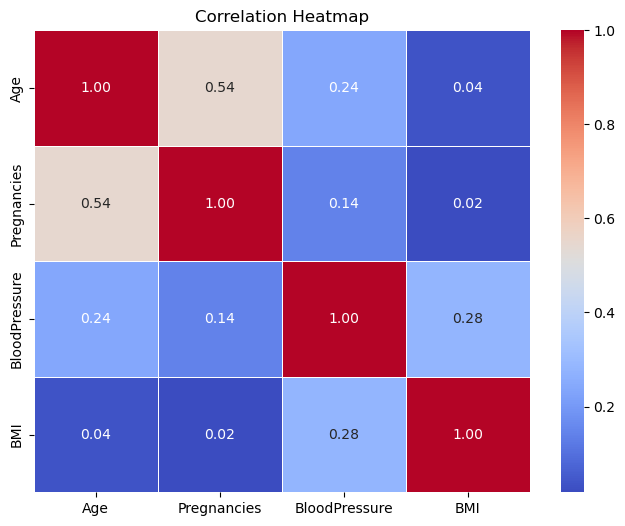

In [16]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = dataset[['Age', 'Pregnancies', 'BloodPressure', 'BMI']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


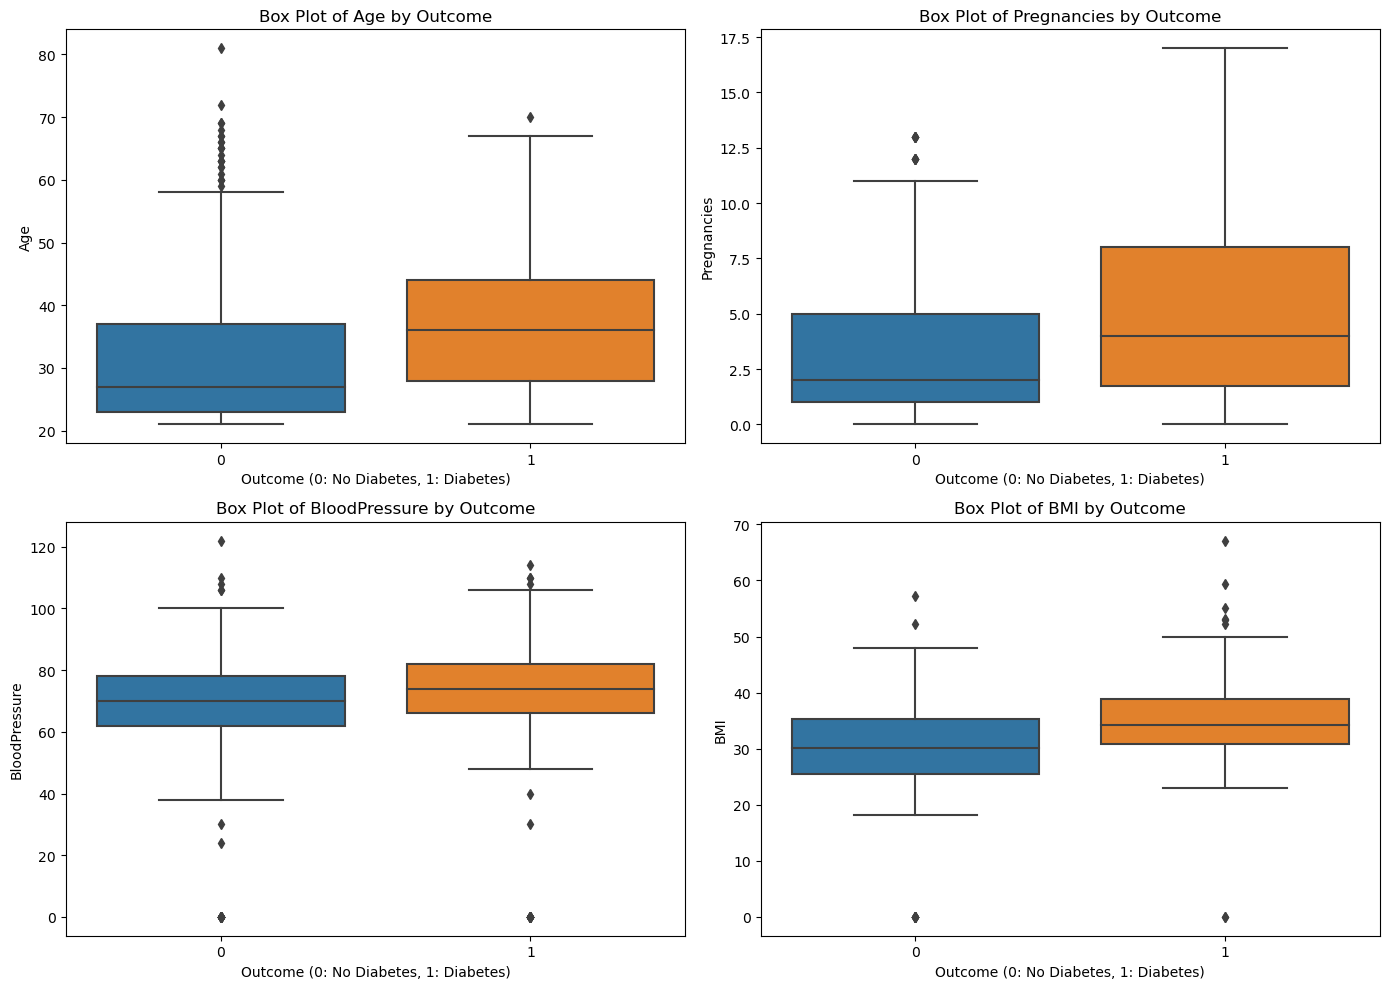

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for box plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Selected variables
selected_variables = ['Age', 'Pregnancies', 'BloodPressure', 'BMI']

# Create box plots for each variable grouped by Outcome
for i, variable in enumerate(selected_variables):
    sns.boxplot(x=dataset['Outcome'], y=dataset[variable], ax=axes[i])
    axes[i].set_title(f'Box Plot of {variable} by Outcome')
    axes[i].set_xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
    axes[i].set_ylabel(variable)

# Adjust layout
plt.tight_layout()
plt.show()


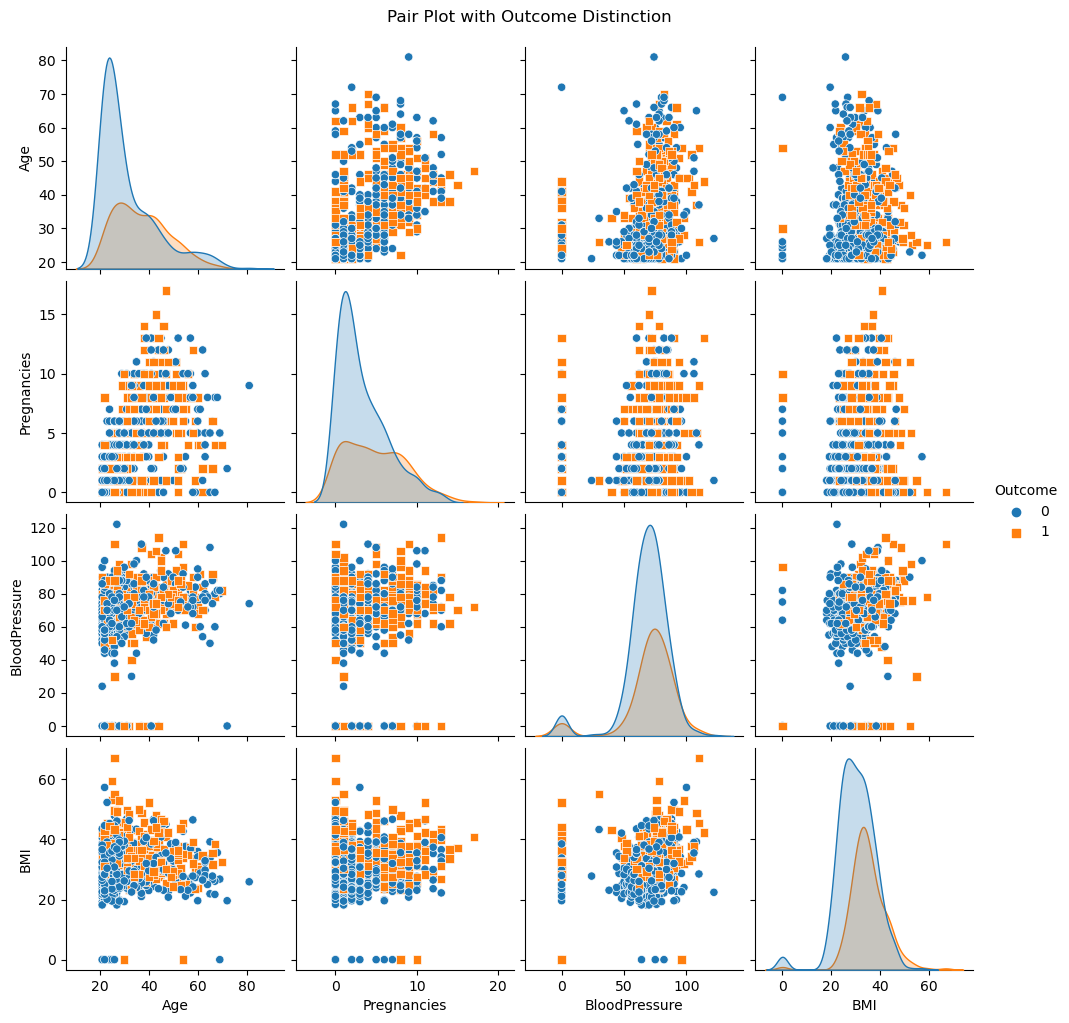

In [18]:
import seaborn as sns

# Create scatter plots for pairs of variables
selected_variables = ['Age', 'Pregnancies', 'BloodPressure', 'BMI']
sns.pairplot(dataset[['Outcome'] + selected_variables], hue='Outcome', markers=["o", "s"])
plt.suptitle('Pair Plot with Outcome Distinction', y=1.02)
plt.show()


## Data Analysis Summary <a id = 'Data_Analysis_Summary'> </a>

**A Note about the dataset**

From the summary statistics, we can make several observations about the dataset:

-  Pregnancies:

The average number of pregnancies is approximately 3.85, with a minimum of 0 and a maximum of 17.
The distribution is right-skewed, as the mean is greater than the median (50th percentile).

-  Glucose:

The average glucose level is around 120.89 mg/dL, with a wide range from 0 to 199 mg/dL.
There seems to be some data quality issues as the minimum glucose level is 0, which is unlikely in a real-world scenario.

-  Blood Pressure:

The average blood pressure is approximately 69.11 mm Hg, with values ranging from 0 to 122 mm Hg.
Similar to glucose, the presence of 0 as a minimum value may indicate missing or erroneous data.

-  Skin Thickness, Insulin, BMI:

Skin thickness, insulin, and BMI also have minimum values of 0, suggesting potential issues or missing data.
These variables have varying means and standard deviations, indicating different degrees of variability.

-  Diabetes Pedigree Function:

The average diabetes pedigree function value is approximately 0.47, with values ranging from 0.078 to 2.42.
The distribution appears to be positively skewed.

-  Age:

The average age is 33.24 years, with a minimum of 21 and a maximum of 81.
The distribution is right-skewed, with a higher concentration of individuals in the younger age range.

-  Outcome:

The outcome variable (0: No Diabetes, 1: Diabetes) is binary, with a mean of approximately 0.35, indicating that about 35% of the individuals in the dataset have diabetes.

-  Missing Values:

There are no missing values in any of the variables based on the provided information.
Overall, the dataset appears to have some data quality issues, particularly with minimum values of 0 in variables like glucose, blood pressure, skin thickness, insulin, and BMI. Further exploration and cleaning may be necessary to address these issues before performing more in-depth analysis or building predictive models. 

Additionally, the dataset seems to focus on individuals' health characteristics, with a significant portion of the population having no diabetes based on the 'Outcome' variable.


## Modeling <a id = 'Modeling'> </a>

For this diabetes dataset, as it involves predicting whether a patient has diabetes (a binary classification), I consider using the following two models.
I can also compare the performance that will help me in  model selection. 

-  **Logistic Regression:**
-  **K-Nearest Neighbors (KNN)**:


### Logistic Regression <a id = 'Logistic_Regression'> </a>

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = dataset[['Age', 'Pregnancies', 'BloodPressure', 'BMI']]
y = dataset['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions_lr = model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, predictions_lr)
conf_matrix_lr = confusion_matrix(y_test, predictions_lr)
classification_rep_lr = classification_report(y_test, predictions_lr)


print(f"\033[4m{'Accuracy'}\033[0m: \n{accuracy_lr}")
print("")

print(f"\033[4m{'Confusion Matrix'}\033[0m: \n{conf_matrix_lr}")
print("")

print(f"\033[4m{'Classification Report'}\033[0m: \n{classification_rep_lr}")
print("")


Accuracy: 
0.6233766233766234

Confusion Matrix: 
[[75 24]
 [34 21]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        99
           1       0.47      0.38      0.42        55

    accuracy                           0.62       154
   macro avg       0.58      0.57      0.57       154
weighted avg       0.61      0.62      0.61       154




### Interpretation

The accuracy of the model is around 62.3%. Accuracy alone might not be sufficient for binary classification, especially when there is class imbalance. In this case, it's important to consider other metrics.

### K-Nearest Neighbors (KNN) <a id = 'KNN'> </a>

In [20]:
# Import Libraries:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Data Preparation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the Features:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train KNN Model:
k = 5  # You can choose an appropriate value for k
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train)


#Preform Predictions
y_pred_knn = knn_classifier.predict(X_test_scaled)


# Evaluate the Model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# print("Accuracy:", accuracy_knn)
# print("Confusion Matrix:\n", conf_matrix_knn)
# print("Classification Report:\n", class_report_knn)



print(f"\033[4m{'Accuracy'}\033[0m: \n{accuracy_knn}")
print("")

print(f"\033[4m{'Confusion Matrix'}\033[0m: \n{conf_matrix_knn}")
print("")

print(f"\033[4m{'Classification Report'}\033[0m: \n{class_report_knn}")
print("")

Accuracy: 
0.6493506493506493

Confusion Matrix: 
[[69 30]
 [24 31]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        99
           1       0.51      0.56      0.53        55

    accuracy                           0.65       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.66      0.65      0.65       154




### Interpretation

Based on the evaluation metrics, the model achieved 65% accuracy

## Conclusion and Future Work <a id = 'Conclusion'> </a>

There are no missing values in any of the variables based on the provided information.

However, the dataset seem to have some data quality issues, particularly with minimum values of 0 in variables like glucose, blood pressure, skin thickness, insulin, and BMI. Further exploration and cleaning may be necessary to address these issues

Additionally, the dataset seem to include significantly more data having no diabetes based on the 'Outcome' variable.

Further exploration and cleaning may be necessary to address these issues. Also, the models can be improved with hyperparater tuning, whcih can be done once the data quality is improved.